# 6.3. Creating interactive Web visualizations with Bokeh and HoloViews

In [1]:
import numpy as np
import pandas as pd
import bokeh
import bokeh.plotting as bkh
bkh.output_notebook()

Loading BokehJS ...

In [2]:
f = bkh.figure(width=600, height=400)
f.circle(np.random.randn(1000),
         np.random.randn(1000),
         size=np.random.uniform(2, 10, 1000),
         alpha=.5)
bkh.show(f)

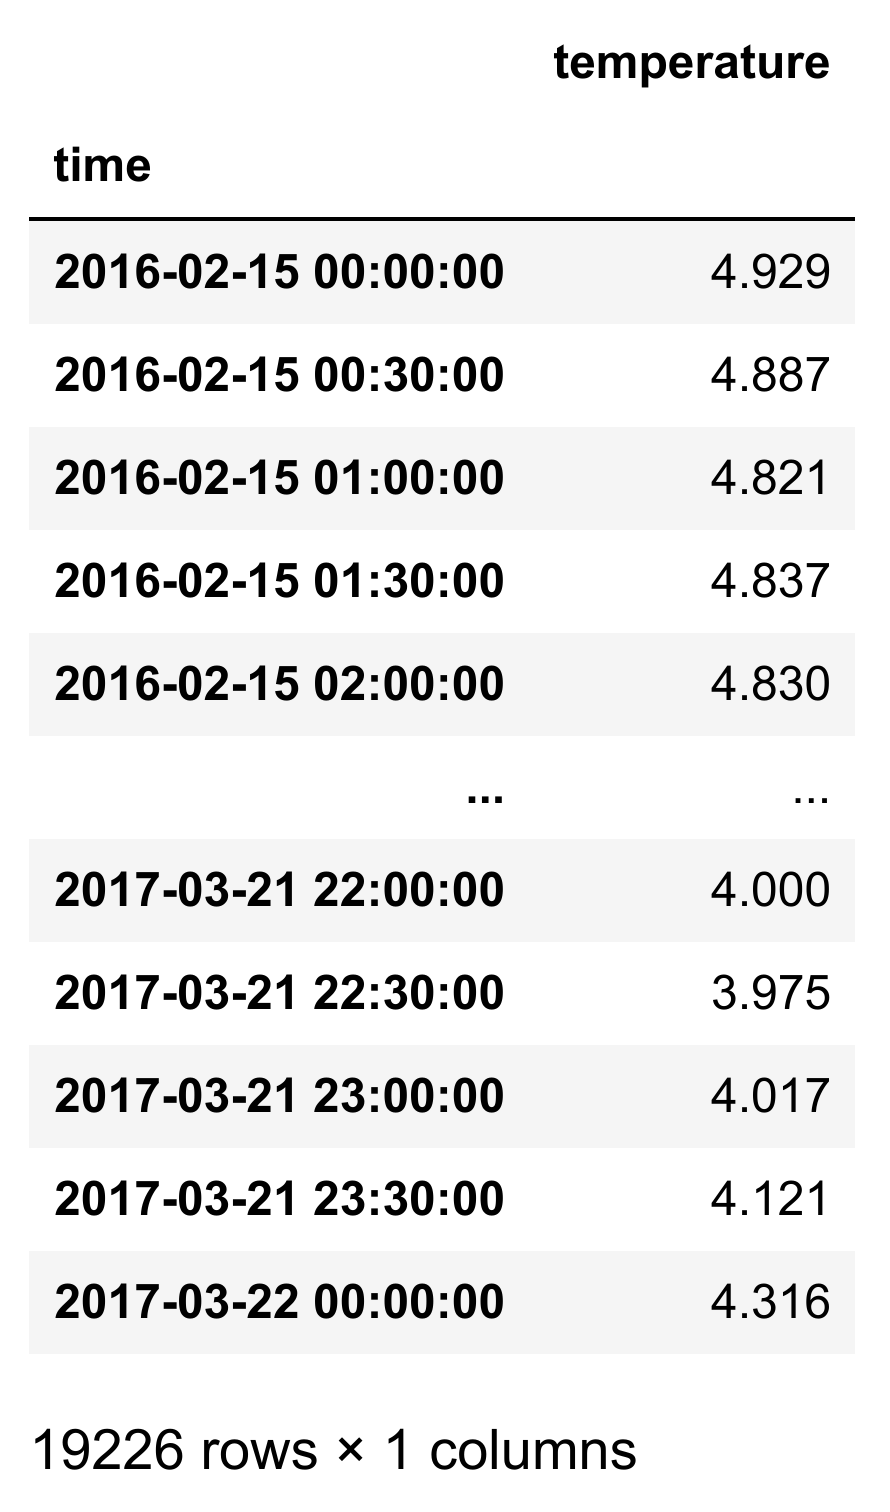

In [3]:
from bokeh.sampledata import sea_surface_temperature
data = sea_surface_temperature.sea_surface_temperature
data

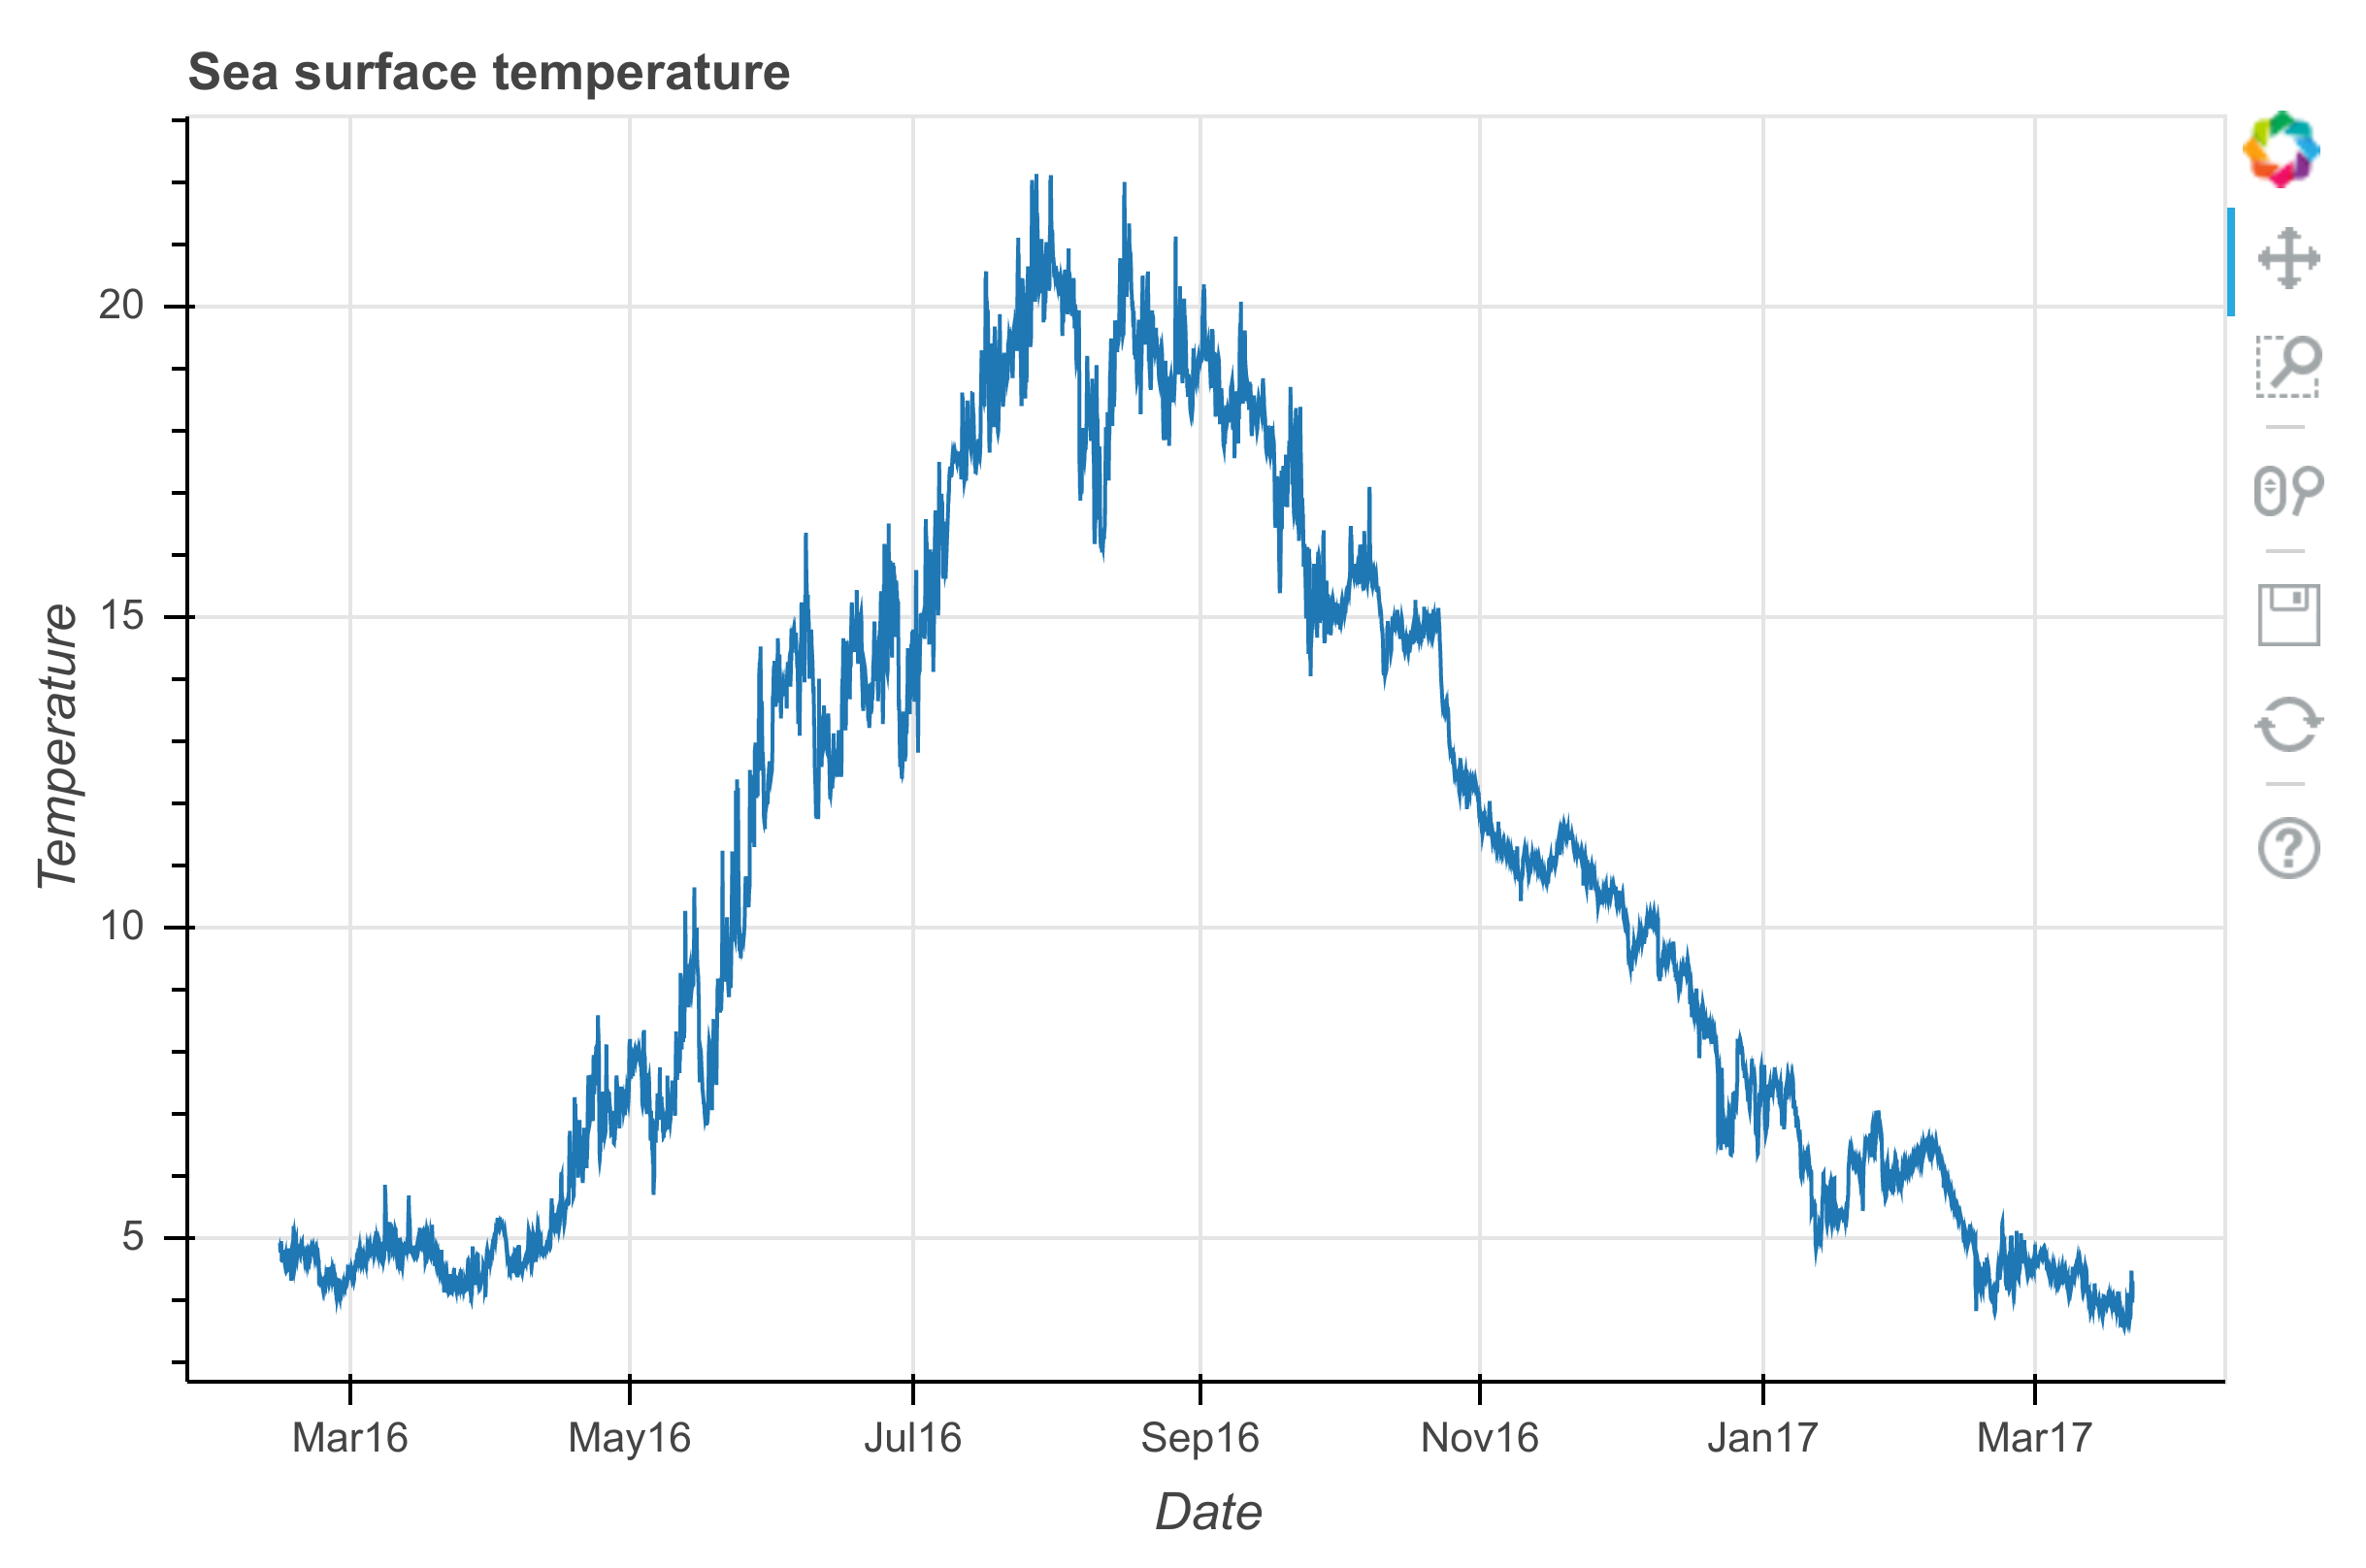

In [4]:
f = bkh.figure(x_axis_type="datetime",
               title="Sea surface temperature",
               width=600, height=400)
f.line(data.index, data.temperature)
f.xaxis.axis_label = "Date"
f.yaxis.axis_label = "Temperature"
bkh.show(f)

In [5]:
months = (6, 7, 8)
data_list = [data[data.index.month == m]
             for m in months]

In [6]:
# We group by the hour of the measure:
data_avg = [d.groupby(d.index.hour).mean()
            for d in data_list]

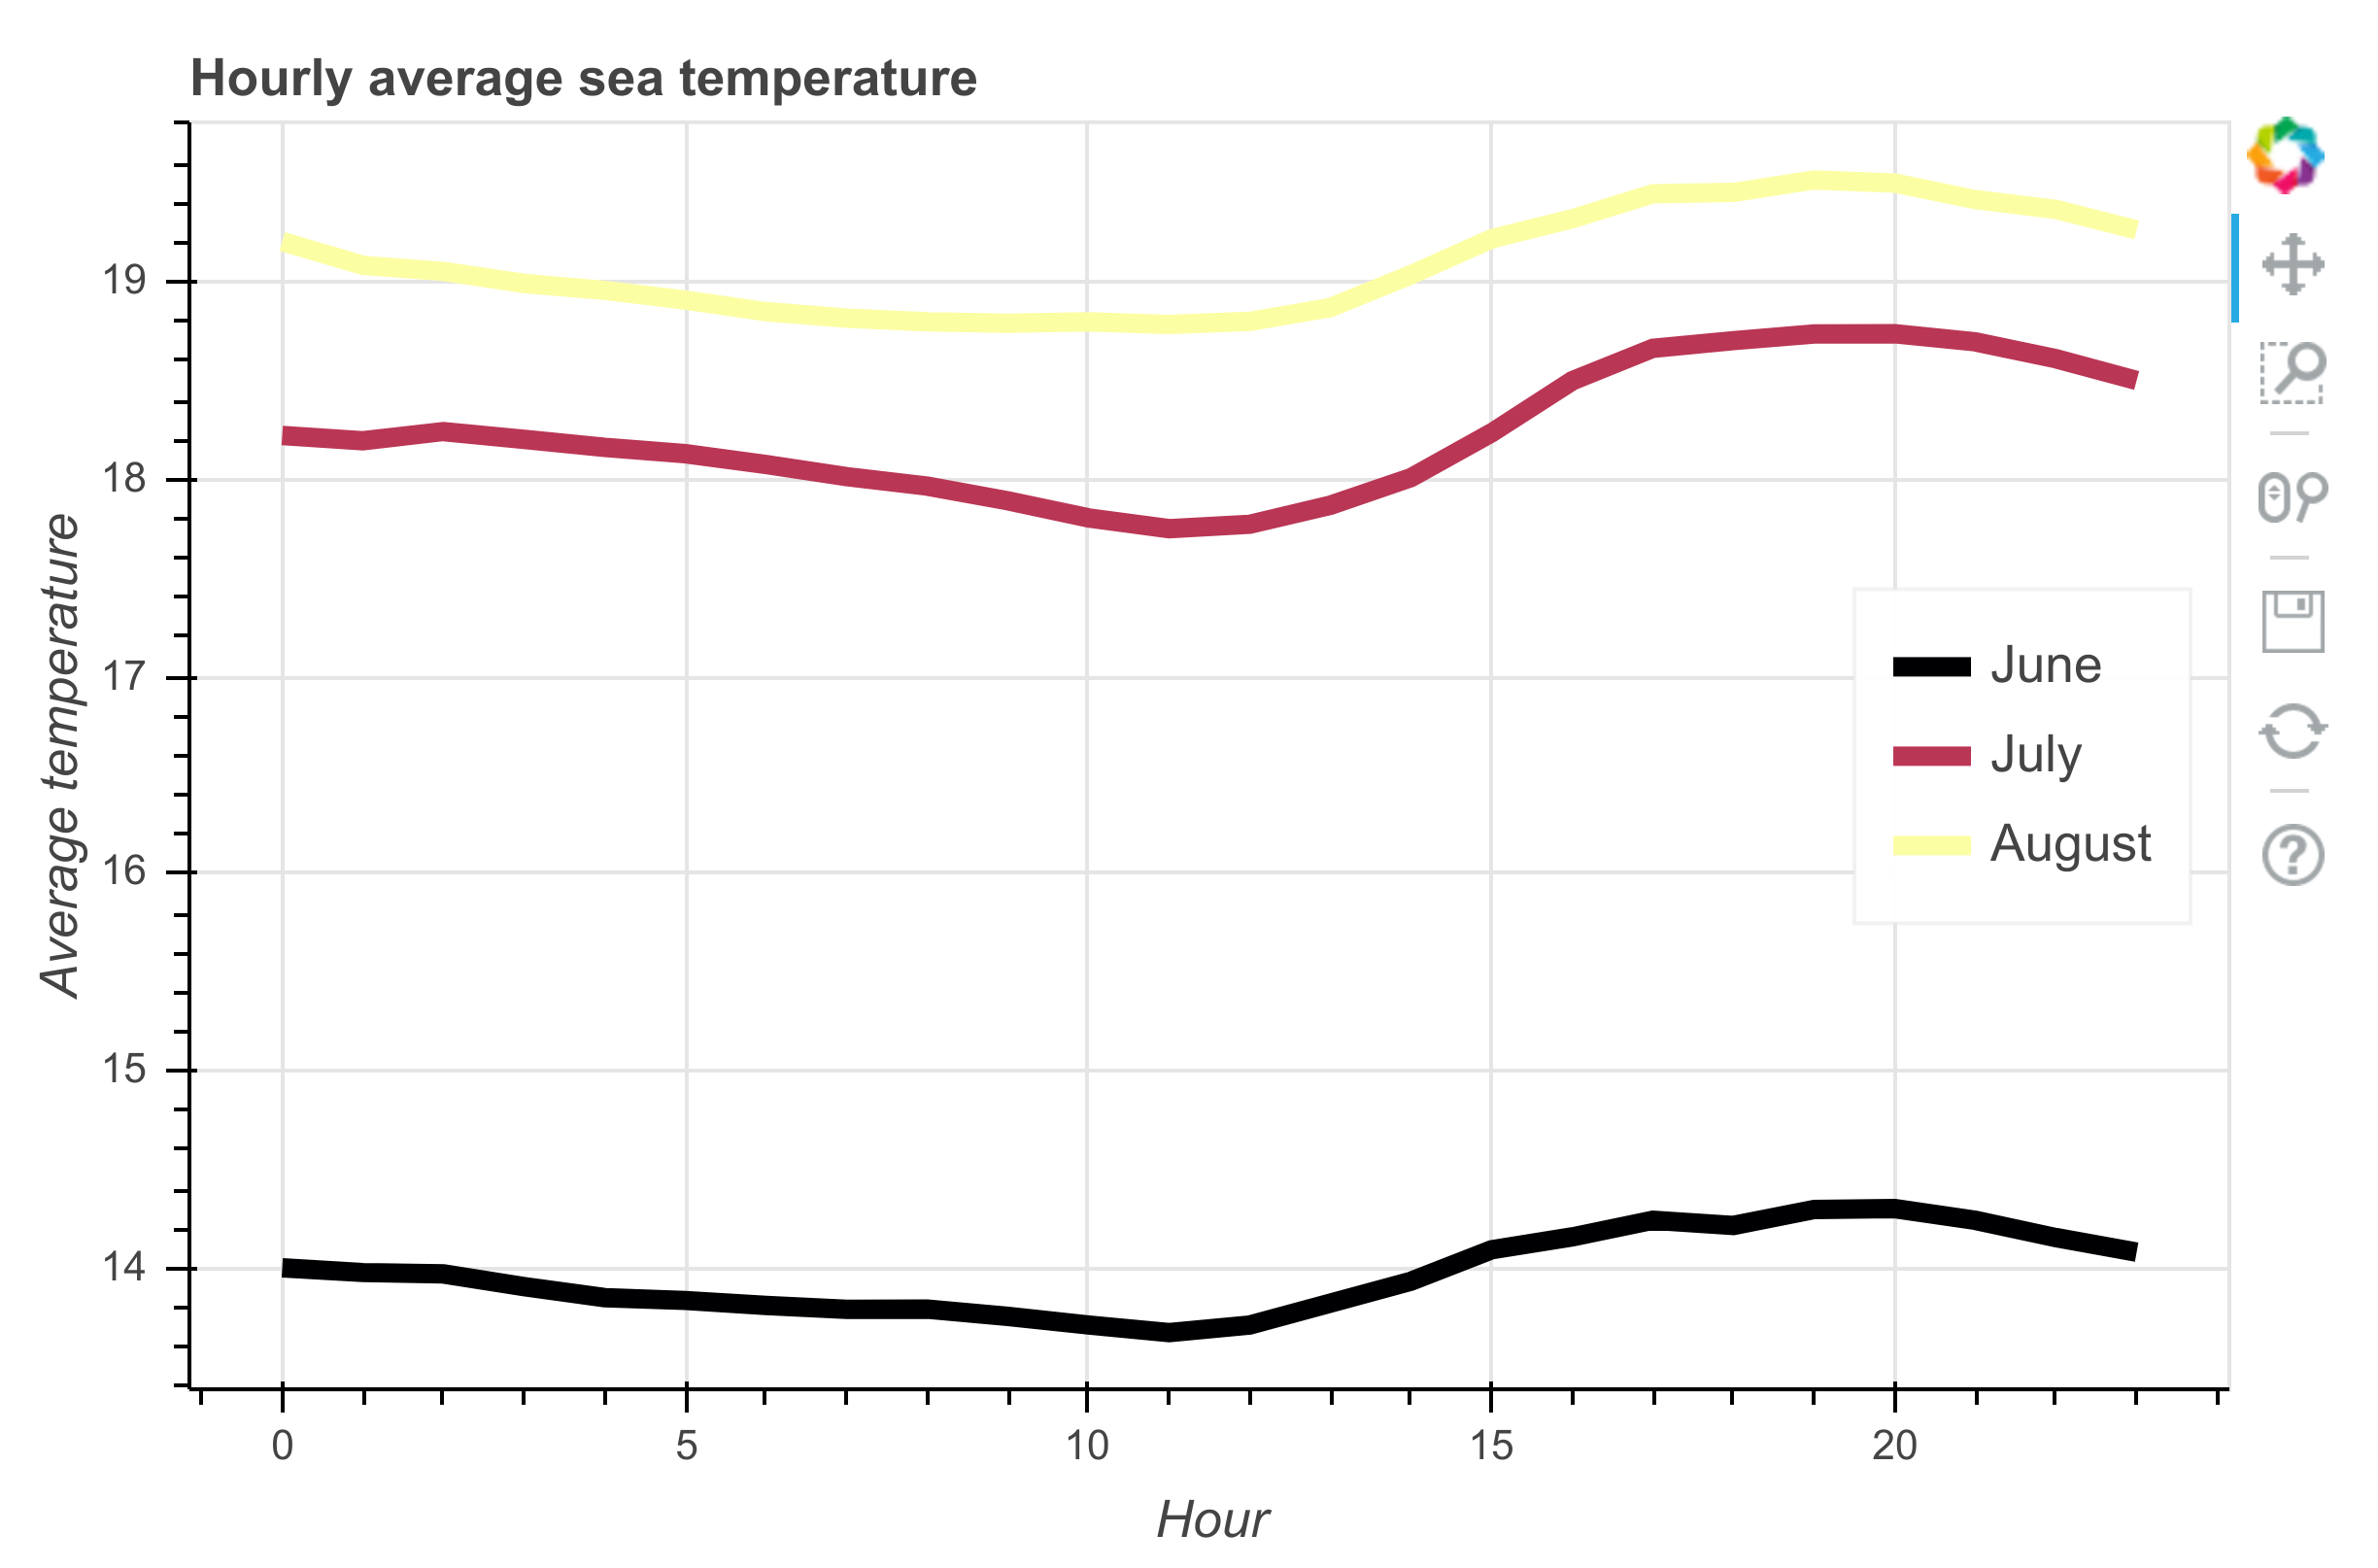

In [7]:
f = bkh.figure(width=600, height=400,
               title="Hourly average sea temperature")
for d, c, m in zip(data_avg,
                   bokeh.palettes.Inferno[3],
                   ('June', 'July', 'August')):
    f.line(d.index, d.temperature,
           line_width=5,
           line_color=c,
           legend=m,
           )
f.xaxis.axis_label = "Hour"
f.yaxis.axis_label = "Average temperature"
f.legend.location = 'center_right'
bkh.show(f)

In [8]:
import holoviews as hv
hv.extension('bokeh')

In [9]:
data = np.random.rand(100, 100, 10)

In [10]:
ds = hv.Dataset((np.arange(10),
                 np.linspace(0., 1., 100),
                 np.linspace(0., 1., 100),
                 data),
                kdims=['time', 'y', 'x'],
                vdims=['z'])

In [11]:
ds

:Dataset   [time,y,x]   (z)

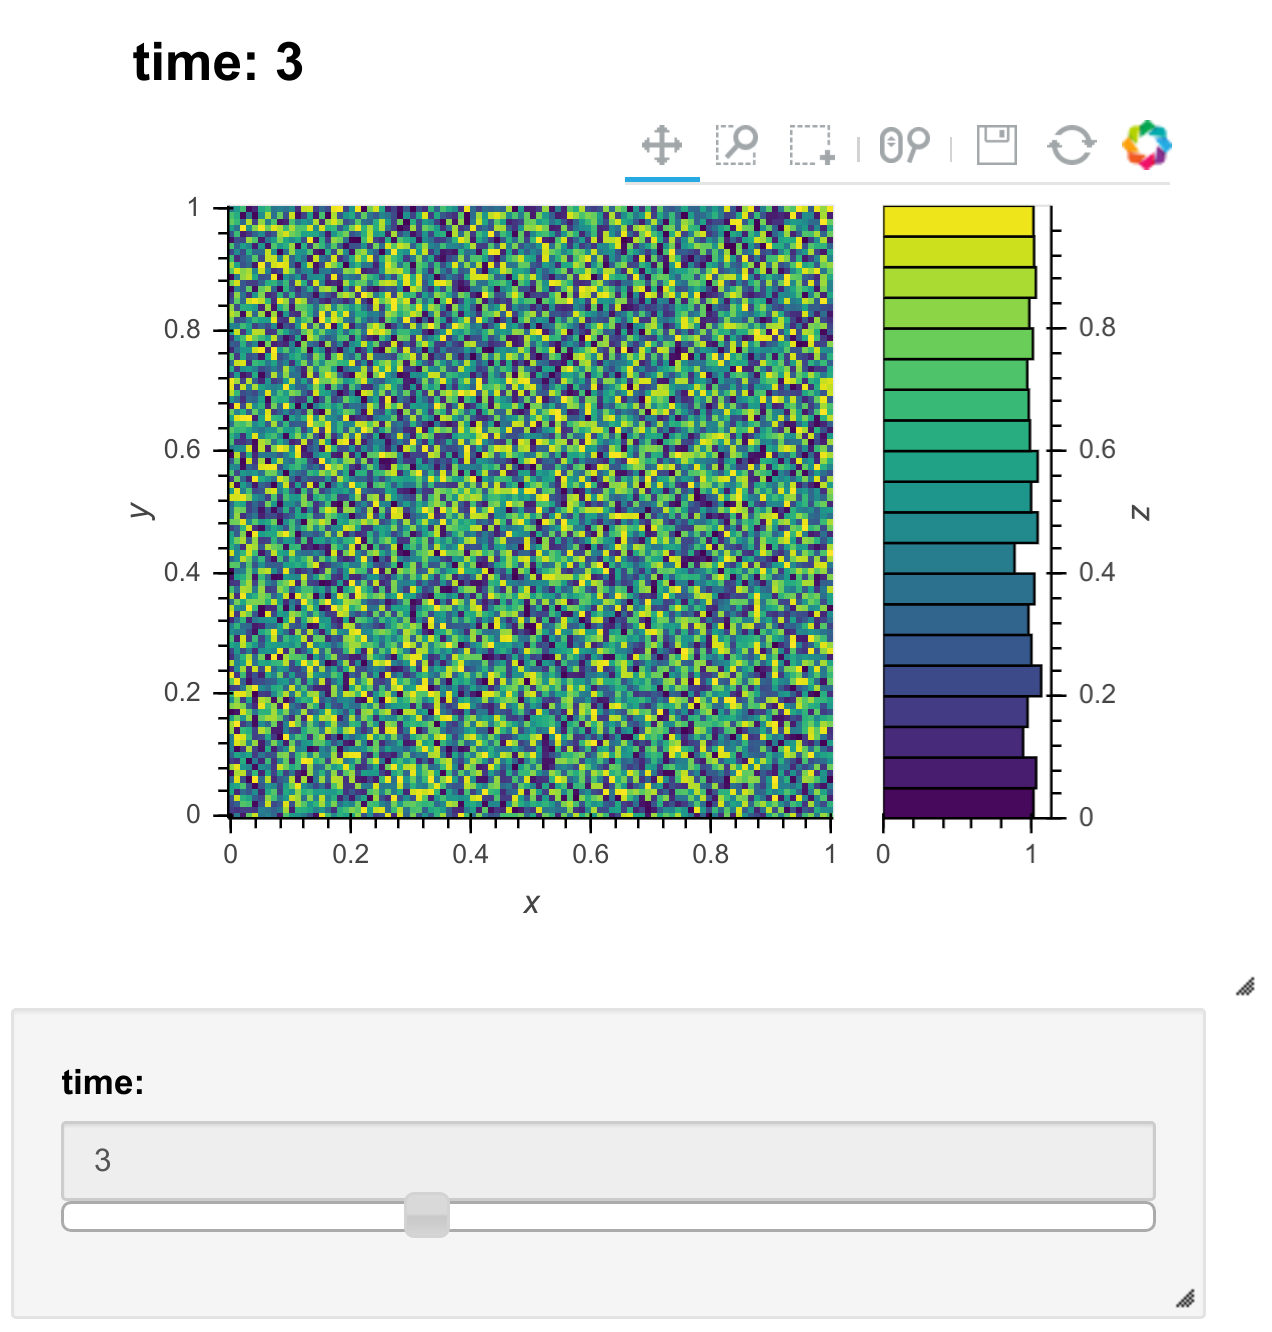

In [12]:
%opts Image(cmap='viridis')
ds.to(hv.Image, ['x', 'y']).hist()